## Understanding the dataset

In [0]:
#from google.colab import files
#files.upload()

In [0]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('data.csv')

In [0]:
#df.head(5)

In [554]:
df.shape

(30697, 28)

In [0]:
#df.columns

In [0]:
#df.isnull().sum()

## Split into train and test data

In [557]:
test = df[df["is_goal"].isnull()]
print(test.shape)

(6268, 28)


In [0]:
#test.isnull().sum()

In [559]:
train = df[df["is_goal"].notnull()]
print(train.shape)

(24429, 28)


In [0]:
#train.isnull().sum()

## Handling missing values

In [0]:
df.fillna(df.mean(), inplace = True)

In [0]:
#df.isnull().sum()

In [563]:
train.fillna(train.mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
#train.isnull().sum()

In [565]:
test.fillna(test.mean(), inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
#test.isnull().sum()

## Collecting required data for predictions

In [0]:
## Power of shot

X1 = train["power_of_shot"].values
#print(X1)

x1 = test["power_of_shot"].values

In [0]:
## Distance of shot

X2 = train["distance_of_shot"].values
#print(X2)

x2 = test["distance_of_shot"].values

In [569]:
## Combining minutes and seconds to get time

train["remaining_time"] = train["remaining_min"]*60 + train["remaining_sec"]
test["remaining_time"] = test["remaining_min"]*60 + test["remaining_sec"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
## Remaining time

X3 = train["remaining_time"].values
#print(X3)
x3 = test["remaining_time"].values

In [0]:
#train["area_of_shot"].unique()

In [0]:
#train["area_of_shot"].mode()

In [573]:
## Mapping area of shot to integer values

area_of_shot_map = {'Left Side(L)':1, 'Left Side Center(LC)':2, 'Right Side Center(RC)':3, 'Center(C)':4, 'Right Side(R)':5, 'Mid Ground(MG)':6, np.nan:4}

df["area_of_shot"] = df["area_of_shot"].map(lambda x:area_of_shot_map[x])
train["area_of_shot"] = train["area_of_shot"].map(lambda x:area_of_shot_map[x])
test["area_of_shot"] = test["area_of_shot"].map(lambda x:area_of_shot_map[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#train.isnull().sum()

In [0]:
## Area of shot

X4 = train["area_of_shot"].values
#print(X4)

x4 = test["area_of_shot"].values

In [0]:
#train["range_of_shot"].unique()

In [0]:
#train["range_of_shot"].mode()

In [578]:
## Mapping range of shot to integer values

range_of_shot_map = {'8-16 ft.':1, '16-24 ft.':2, 'Less Than 8 ft.':3, '24+ ft.':4, 'Back Court Shot':5, np.nan:3}

df["range_of_shot"] = df["range_of_shot"].map(lambda x:range_of_shot_map[x])
train["range_of_shot"] = train["range_of_shot"].map(lambda x:range_of_shot_map[x])
test["range_of_shot"] = test["range_of_shot"].map(lambda x:range_of_shot_map[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
## Range of shot

X5 = train["range_of_shot"].values
#print(X5)

x5 = test["range_of_shot"].values

In [0]:
#train["shot_basics"].unique()

In [0]:
#train["shot_basics"].mode()

In [582]:
## Mapping shot basics to integer values

shot_basics_map = {'Mid Range':1, 'Goal Area':2, 'Goal Line':3, 'Penalty Spot':4, 'Right Corner':5, 'Mid Ground Line':6, 'Left Corner':7, np.nan:1}

df["shot_basics"] = df["shot_basics"].map(lambda x:shot_basics_map[x])
train["shot_basics"] = train["shot_basics"].map(lambda x:shot_basics_map[x])
test["shot_basics"] = test["shot_basics"].map(lambda x:shot_basics_map[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
## Shot basics

X6 = train["shot_basics"].values
#print(X6)

x6 = test["shot_basics"].values

In [0]:
X7 = train["location_x"].values
x7 = test["location_x"].values

In [0]:
X8 = train["location_y"].values
x8 = test["location_y"].values

In [0]:
#train.isnull().sum()

In [587]:
Y = train["is_goal"].values
print(Y)

[0. 1. 0. ... 1. 0. 0.]


In [0]:
# plt.scatter(X1, X2, c=Y)
# plt.show()

In [0]:
a = np.array(X1)
a1 = np.array(x1)
#print(a)

In [0]:
b = np.array(X2)
b1 = np.array(x2)
#print(b)

In [0]:
c = np.array(X3)
c1 = np.array(x3)
#print(c)

In [0]:
d = np.array(X4)
d1 = np.array(x4)
#print(d)

In [0]:
e = np.array(X5)
e1 = np.array(x5)
#print(e)

In [594]:
f = np.array(X6)
f1 = np.array(x6)
print(f1.shape)
#print(f)

(6268,)


In [595]:
g = np.array(X7)
g1 = np.array(x7)
print(g1.shape)

(6268,)


In [596]:
h = np.array(X8)
h1 = np.array(x8)
print(h1.shape)

(6268,)


In [0]:
X = np.column_stack((a,b,c,d,e,f,g,h))
X_test = np.column_stack((a1,b1,c1,d1,e1,f1,g1,h1))
#print(X)

# PREDICTIONS

In [0]:
Y_true = Y

### 1. Logistic Regression

In [0]:
#from sklearn.linear_model import LogisticRegression

In [0]:
#classifier_logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [0]:
#classifier_logistic.fit(X,Y)

In [0]:
#Y_predict_logistic = classifier_logistic.predict(X)

### 2. KNN

In [0]:
#from sklearn.neighbors import KNeighborsClassifier

In [0]:
#classifier_knn = KNeighborsClassifier(n_neighbors=3)

In [0]:
#classifier_knn.fit(X,Y)

In [0]:
#Y_predict_knn = classifier_knn.predict(X)

### 3. Support Vector Machine

In [0]:
#from sklearn.svm import SVC

In [0]:
#classifier_svm = SVC(gamma = 'auto', probability=True)

In [0]:
#classifier_svm.fit(X,Y)

In [0]:
#classifier_svm.score(X, Y)

In [0]:
#Y_predict_svm = classifier_svm.predict_proba(X)
#Y_predict_svm = classifier_svm.predict(X)
#print(Y_predict_svm)

### 4. Random Forest 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier_randomforest = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=0)

In [614]:
classifier_randomforest.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
#classifier_randomforest.score(X,Y)

In [0]:
Y_predict_rf = classifier_randomforest.predict(X)

### 5. XGBoost

In [0]:
import xgboost as xgb

In [0]:
classifier_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

In [619]:
classifier_xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
Y_predict_xgb = classifier_xgb.predict(X)

### 6. Gradient Boosting 

In [0]:
#from sklearn.ensemble import GradientBoostingClassifier

In [0]:
#classifier_gb = GradientBoostingClassifier()

In [0]:
#classifier_gb.fit(X,Y)

In [0]:
#Y_predict_gb = classifier_gb.predict(X)

### 7. Decision Tree

In [0]:
#from sklearn.tree import DecisionTreeClassifier

In [0]:
#classifier_decisionT = DecisionTreeClassifier(random_state=0)

In [0]:
#classifier_decisionT.fit(X,Y)

In [0]:
#Y_predict_decisionT = classifier_decisionT.predict(X)

### 8. Naive Bayes

In [0]:
#from sklearn.naive_bayes import *

In [0]:
#classifier_nb_bernoulli = BernoulliNB()
#classifier_nb_multinomial = MultinomialNB()
#classifier_nb_gaussian = GaussianNB()

In [0]:
#classifier_nb_bernoulli.fit(X,Y)

In [0]:
#classifier_nb_multinomial.fit(X,Y)

In [0]:
#classifier_nb_gaussian.fit(X,Y)

In [0]:
#Y_predict_nb_bernoulli = classifier_nb_bernoulli.predict(X)
#Y_predict_nb_multinomial = classifier_nb_multinomial.predict(X)
#Y_predict_nb_gaussian = classifier_nb_gaussian.predict(X)

### 9. Neural Networks

In [0]:
#from sklearn.neural_network import MLPClassifier

In [0]:
#classifier_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
 #                    solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [0]:
#classifier_mlp.fit(X,Y)

In [0]:
#Y_predict_mlp = classifier_mlp.predict(X)

### 10. Ada Boost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
classifier_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

In [641]:
classifier_ada.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [0]:
Y_predict_ada = classifier_ada.predict(X)

### 11. Quadratic Discriminant Analysis

In [0]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
#classifier_qda = QuadraticDiscriminantAnalysis()

In [0]:
#classifier_qda.fit(X,Y)

In [0]:
#Y_predict_qda = classifier_qda.predict(X)

## Calculating MAE score

In [0]:
#from sklearn.metrics import mean_absolute_error

In [0]:
#mean_absolute_error(Y_true, Y_predict_logistic)

In [0]:
#mean_absolute_error(Y_true, Y_predict_knn)

In [0]:
#mean_absolute_error(Y_true, Y_predict_svm)

In [651]:
mean_absolute_error(Y_true, Y_predict_rf)

0.18776863563797128

In [652]:
mean_absolute_error(Y_true, Y_predict_xgb)

0.3859347496827541

In [0]:
#mean_absolute_error(Y_true, Y_predict_gb)

In [0]:
#mean_absolute_error(Y_true, Y_predict_decisionT)

In [0]:
#mean_absolute_error(Y_true, Y_predict_nb_bernoulli)

In [0]:
#mean_absolute_error(Y_true, Y_predict_nb_multinomial)

In [0]:
#mean_absolute_error(Y_true, Y_predict_nb_gaussian)

In [0]:
#mean_absolute_error(Y_true, Y_predict_mlp)

In [659]:
mean_absolute_error(Y_true, Y_predict_ada)

0.388186172172418

In [0]:
#mean_absolute_error(Y_true, Y_predict_qda)

In [0]:
# score = 1/(1+mae)
# print(score)

## Calculating cross-validation score

In [0]:
#from sklearn.model_selection import cross_val_score

In [0]:
#cross_val_score(classifier_logistic, X, Y)

In [0]:
#cross_val_score(classifier_knn, X, Y)

In [0]:
#cross_val_score(classifier_svm, X, Y)

In [666]:
cross_val_score(classifier_randomforest, X, Y).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5923699768028666

In [667]:
cross_val_score(classifier_xgb, X, Y).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6066971506717791

In [0]:
#cross_val_score(classifier_gb, X, Y)

In [0]:
#cross_val_score(classifier_decisionT, X, Y)

In [0]:
#cross_val_score(classifier_nb_bernoulli, X, Y)

In [0]:
#cross_val_score(classifier_nb_multinomial, X, Y)

In [0]:
#cross_val_score(classifier_nb_gaussian, X, Y)

In [0]:
#cross_val_score(classifier_mlp, X, Y)

In [674]:
cross_val_score(classifier_ada, X, Y).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6072702953404062

In [0]:
#cross_val_score(classifier_qda, X, Y)

## Predictions

In [0]:
# Y_predict_decisionT_test = classifier_decisionT.predict_proba(X_test)
# predict_dt = Y_predict_decisionT_test[:,1]
# print(predict_dt)

In [0]:
# plt.hist(predict_dt)

In [678]:
Y_predict_rf_test = classifier_randomforest.predict_proba(X_test)
predict_rf = Y_predict_rf_test[:,1]
print(predict_rf)

[0.37295077 0.46376343 0.75965145 ... 0.42857169 0.52425075 0.70919033]


(array([  27.,   70.,  283., 1130., 1937., 1289.,  616.,  713.,  147.,
          56.]),
 array([0.        , 0.08900709, 0.17801419, 0.26702128, 0.35602837,
        0.44503547, 0.53404256, 0.62304965, 0.71205675, 0.80106384,
        0.89007093]),
 <a list of 10 Patch objects>)

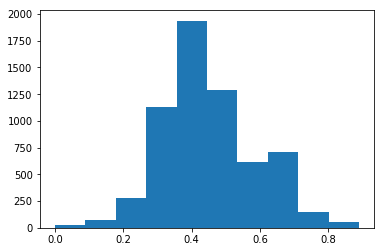

In [679]:
plt.hist(predict_rf)

In [680]:
Y_predict_xgb_test = classifier_xgb.predict_proba(X_test)
predict_xgb = Y_predict_xgb_test[:,1]
print(predict_xgb)

[0.39063123 0.5039306  0.5306204  ... 0.45411533 0.45073882 0.6509716 ]


(array([  27.,   15.,   50.,  178.,  828., 2444., 1293.,  222.,  665.,
         546.]),
 array([0.01414344, 0.08413088, 0.15411831, 0.22410575, 0.2940932 ,
        0.3640806 , 0.43406805, 0.5040555 , 0.5740429 , 0.6440304 ,
        0.7140178 ], dtype=float32),
 <a list of 10 Patch objects>)

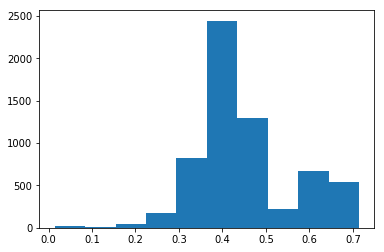

In [681]:
plt.hist(predict_xgb)

In [682]:
Y_predict_ada_test = classifier_ada.predict_proba(X_test)
predict_ada = Y_predict_ada_test[:,1]
print(predict_ada)

[0.49915321 0.50139336 0.49967227 ... 0.49984982 0.49966347 0.50128642]


(array([1.100e+01, 0.000e+00, 1.000e+00, 1.600e+01, 6.238e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.41587782, 0.43337735, 0.45087689, 0.46837642, 0.48587595,
        0.50337548, 0.52087501, 0.53837455, 0.55587408, 0.57337361,
        0.59087314]),
 <a list of 10 Patch objects>)

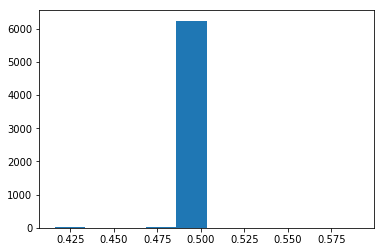

In [683]:
plt.hist(predict_ada)

## Writing predicted outputs to a .csv file

In [0]:
#test["shot_id_number"] = test.index+1

In [0]:
#test["shot_id_number"].shape

In [0]:
#X_test.shape[0]

In [0]:
import csv

cs = pd.DataFrame({"shot_id_number":test["shot_id_number"], "is_goal":predict_rf})
#cs.head()
cs.to_csv('cheshta_kwatra_032998_prediction_2.csv', index=False)

In [0]:
# cs = pd.DataFrame({"shot_id_number":test["shot_id_number"], "is_goal":predict_rf})
# #cs.head()
# cs.to_csv('cheshta_kwatra_032998_prediction_2.csv', index=False)

In [0]:
# cs = pd.DataFrame({"shot_id_number":test["shot_id_number"], "is_goal":predict_xgb})
# #cs.head()
# cs.to_csv('cheshta_kwatra_032998_prediction_3.csv', index=False)

In [0]:
# cs = pd.DataFrame({"shot_id_number":test["shot_id_number"], "is_goal":predict_ada})
# #cs.head()
# cs.to_csv('cheshta_kwatra_032998_prediction_4.csv', index=False)

In [0]:
# files.download('cheshta_kwatra_032998_prediction_1.csv')
 files.download('cheshta_kwatra_032998_prediction_2.csv')
# files.download('cheshta_kwatra_032998_prediction_3.csv')
# files.download('cheshta_kwatra_032998_prediction_4.csv')